# Data Science - Laboratorio 1 - Series de tiempo
## Dataset: Daily Total Female Births

Sofia Velasquez 22049

José Marchena 22398


### 0. Obtencion de datos

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

dateparse = lambda dates: datetime.strptime(dates, '%Y-%m-%d')
female_births = pd.read_csv(
    './data/daily-total-female-births.csv', 
    parse_dates=['Date'], 
    index_col='Date',
    date_parser=dateparse
)

division = int(len(female_births)*0.7)
train_female_births = female_births[:division]
test_female_births = female_births[division:]

print(female_births.shape)
print(train_female_births.shape)
print(test_female_births.shape)


(365, 1)
(255, 1)
(110, 1)


C:\Users\JM\AppData\Local\Temp\ipykernel_23540\3625918089.py:7: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  female_births = pd.read_csv(


### 1. Analisis Exploratorio

Importing plotly failed. Interactive plots will not work.


Description
           Births
count  365.000000
mean    41.980822
std      7.348257
min     23.000000
25%     37.000000
50%     42.000000
75%     46.000000
max     73.000000
Time Series


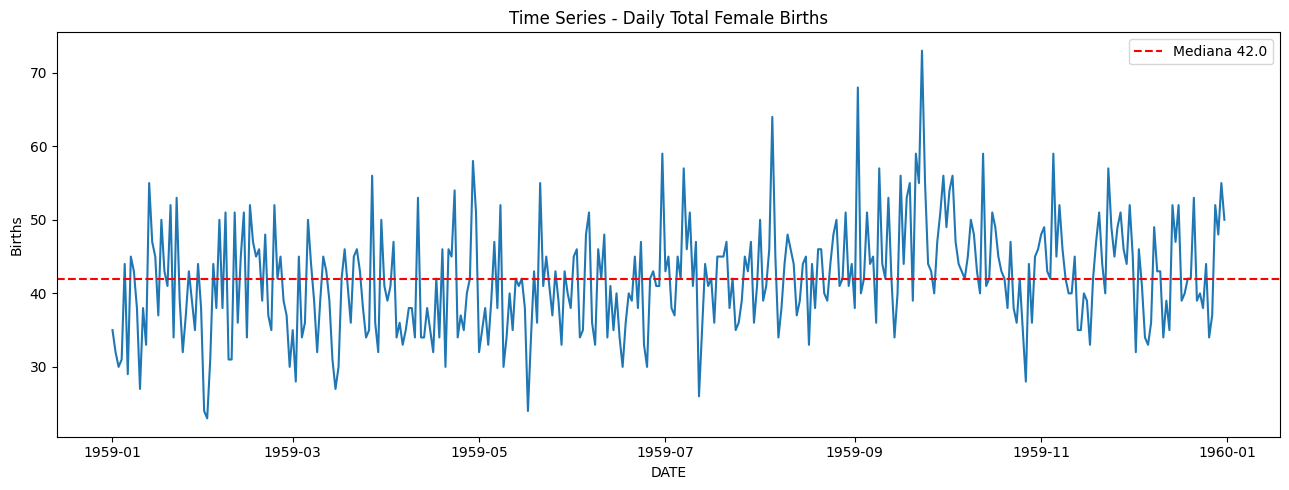

Seasonal Decompose
Resultados del Test de Dickey Fuller
Estadístico de prueba         -4.808291
p-value                        0.000052
# de retardos usados           6.000000
# de observaciones usadas    358.000000
Critical Value (1%)           -3.448749
Critical Value (5%)           -2.869647
Critical Value (10%)          -2.571089
dtype: float64
Se rechaza Hipotesis Nula => data es estacionaria en media
ACF plot


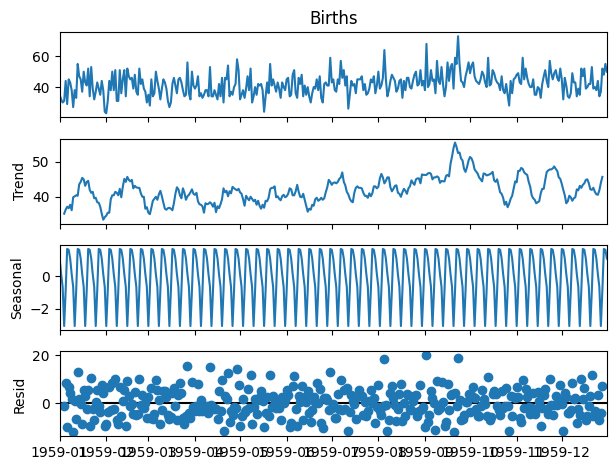

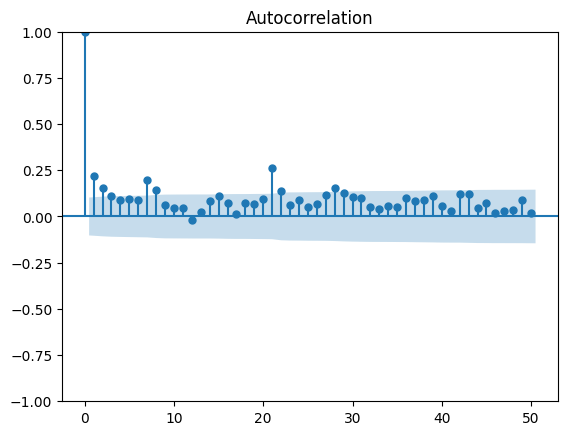

In [2]:
from scripts import exploratory_analysis
date = "Date"
value = "Births"
title = "Daily Total Female Births"

exploratory_analysis(
    female_births,
    value,
    title
)

### 2. Moving Average

Finding Best Period
Best Lag is 20 with weight of 0.1739913346230196


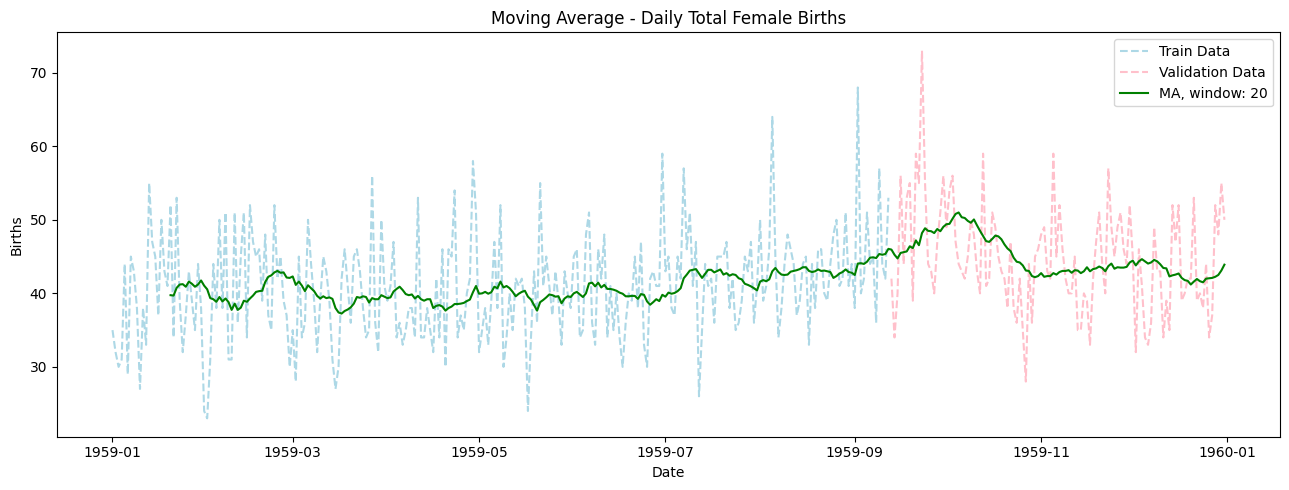

In [3]:
from statsmodels.graphics.tsaplots import acf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scripts import moving_average
moving_average(female_births, test_female_births,train_female_births, value, title)

In [4]:
from scripts import print_error_metrics
# Con mejor lag de 20 para el analisis de correlacion, podemos usar este para las metrica de error

y_pred_ma = test_female_births.rolling(window=20).mean()
# ignorar los primeros 19 que no tendran prediccion
print_error_metrics(y_pred_ma[19:], test_female_births[19:], "MA - "+title)

Error Metrics - MA - Daily Total Female Births
MAE  (Mean Absolute Error):      5.2714
MSE  (Mean Squared Error):       41.0301
RMSE (Root Mean Squared Error):  6.4055
R²   (R-squared):                -0.0042


#### 3. Simple Exponential Smoothing

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


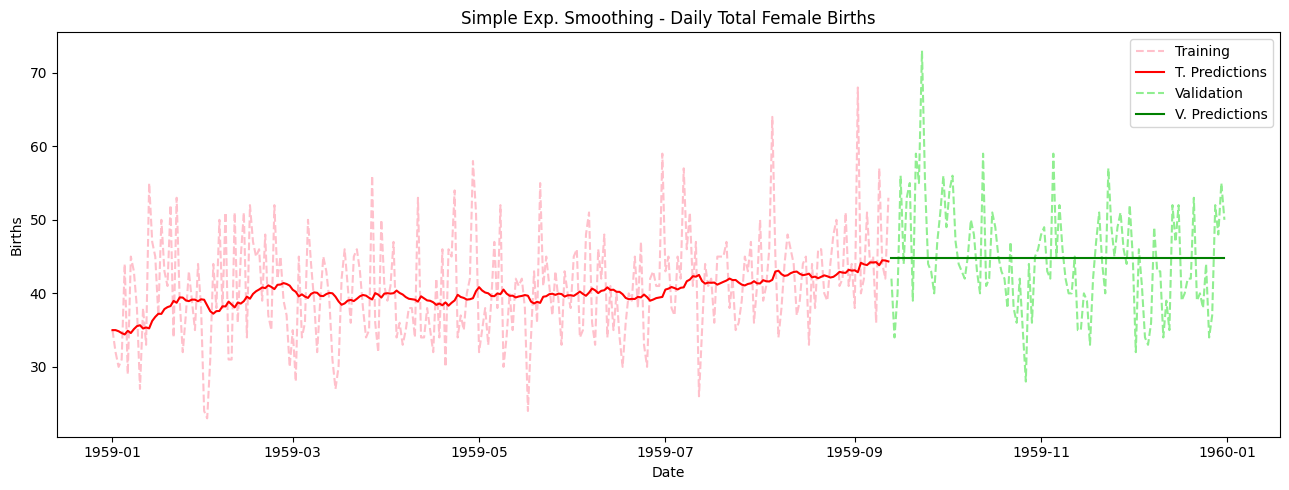

Error Metrics - SES - Daily Total Female Births
MAE  (Mean Absolute Error):      5.6571
MSE  (Mean Squared Error):       51.9212
RMSE (Root Mean Squared Error):  7.2056
R²   (R-squared):                -0.0001


In [5]:
from scripts import ses_graph

ses_graph(train_female_births, test_female_births, value, title)

#### 4. Holt-Winters algorithms

##### 4.1 Lineal HW

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


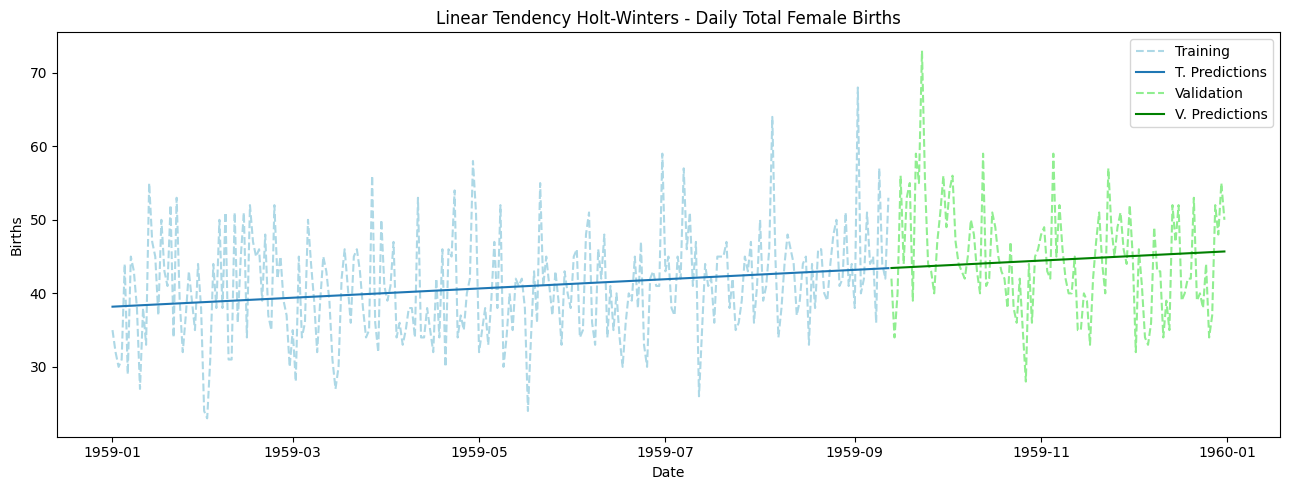

Error Metrics - Lineal HW - Daily Total Female Births
MAE  (Mean Absolute Error):      5.7235
MSE  (Mean Squared Error):       54.6270
RMSE (Root Mean Squared Error):  7.3910
R²   (R-squared):                -0.0522


In [6]:
from scripts import lineal_hw, seasonal_hw
lineal_hw(train_female_births, test_female_births, value, title)

##### 4.2 Seasonal Holt-Winters

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


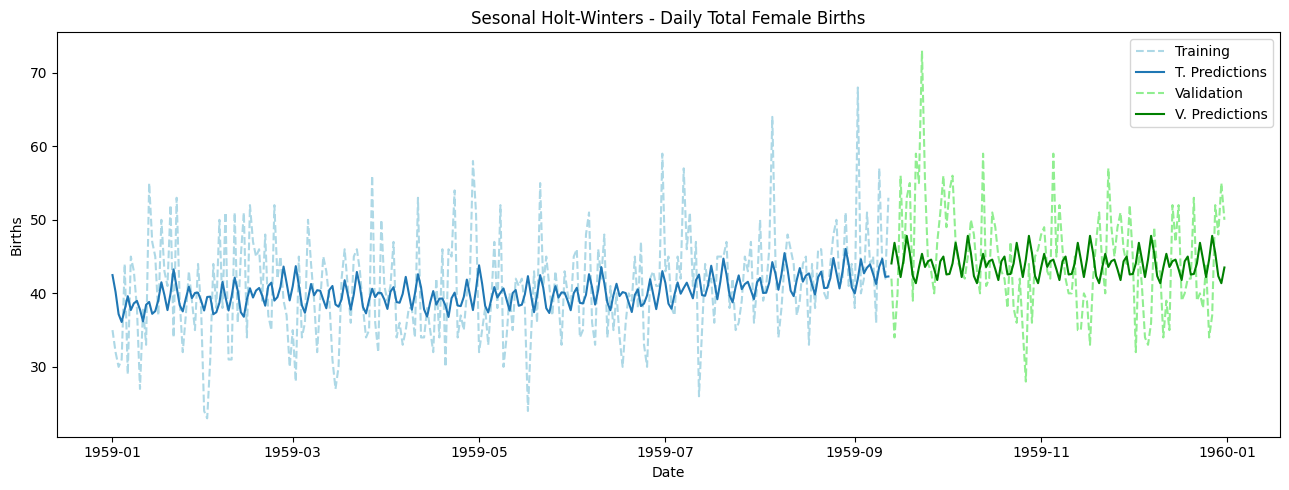

Error Metrics - Seasonal HW - Daily Total Female Births
MAE  (Mean Absolute Error):      6.0690
MSE  (Mean Squared Error):       59.1202
RMSE (Root Mean Squared Error):  7.6890
R²   (R-squared):                -0.1388


In [7]:
# Con el mejor periodo segun ACF
seasonal_hw(train_female_births, test_female_births, value, title, 20)

### 5. Modelo SARIMA 

C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


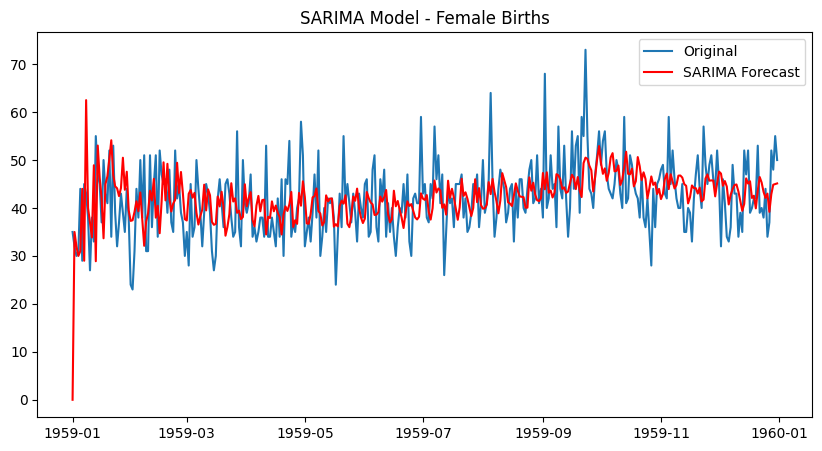

Model Summary:
                                     SARIMAX Results                                     
Dep. Variable:                            Births   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -1210.618
Date:                           Fri, 18 Jul 2025   AIC                           2431.235
Time:                                   17:10:54   BIC                           2450.624
Sample:                               01-01-1959   HQIC                          2438.947
                                    - 12-31-1959                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1066      0.065      1.651      0.099      -0.020       0.233
ma.L1         -0.9630      0

In [22]:
from scripts import sarima_model

# Aplicar el modelo SARIMA
sarima_model(female_births.copy(), 'Date', 'Births', order=(1,1,1), seasonal_order=(1,1,1,7), title="Female Births")



*Parámetros: (1,1,1)(1,1,1,7)*

- Usé m=7 porque los nacimientos diarios pueden presentar un patrón semanal.


### 6. Modelar serie de tiempo con Prophet

In [24]:
# !pip install plotly
# !pip install prophet

17:26:20 - cmdstanpy - INFO - Chain [1] start processing
17:26:20 - cmdstanpy - INFO - Chain [1] done processing


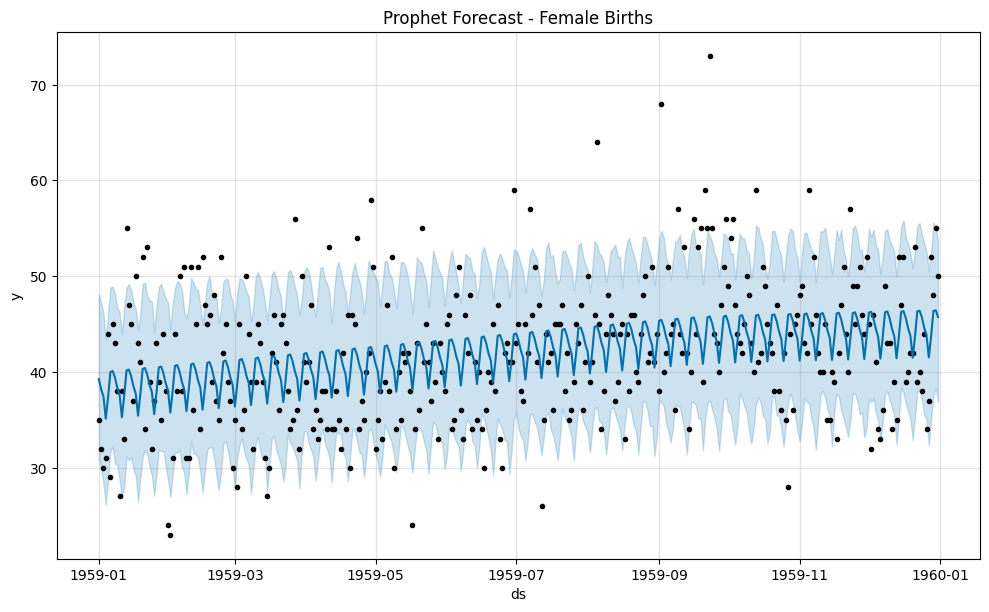

Female Births - Prophet MSE: 46.72, MAE: 5.38


In [26]:
from scripts import apply_prophet

# Aplicar Prophet
apply_prophet(female_births.copy(), 'Date', 'Births', title="Female Births")


### Comparación de modelos Sarima y Prophet

In [31]:
from scripts import compare_models

# Comparar modelos SARIMA y Prophet
results = []
results.append(compare_models(female_births, 'Date', 'Births', (1,1,1), (1,1,1,7), "Female Births"))

# Convertir resultados en DataFrame
comparison_df = pd.DataFrame(results)
print("\n Comparación de Modelos:\n")
print(comparison_df)

C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
17:48:04 - cmdstanpy - INFO - Chain [1] start processing
17:48:04 - cmdstanpy - INFO - Chain [1] done processing



 Comparación de Modelos:

         Dataset  SARIMA_RMSE  SARIMA_MAE  Prophet_RMSE  Prophet_MAE  \
0  Female Births         7.62        5.86          6.84         5.38   

  Best_Model  
0    Prophet  
